In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


In [3]:
scaler = StandardScaler()

**Introduction**

Various factors influence delivery time, including weather conditions, traffic levels, vehicle type, courier experience, and order preparation time. Understanding these factors can help optimize logistics, improve delivery efficiency, and enhance customer experience.This study aligns with UNSDG Goal 9 (Industry, Innovation, and Infrastructure) and Goal 11 (Sustainable Cities and Communities) by promoting efficient transportation and sustainable urban logistics.

In [4]:
df = pd.read_csv("/content/drive/My Drive/Herald College/Semester03/Concepts-AI/finalAssesment/regression/Food_Delivery_Times.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


# Data preprocessing

In [5]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [6]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [7]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


In [10]:
df["Time_of_Day"].unique()

array(['Afternoon', 'Evening', 'Night', 'Morning'], dtype=object)

In [11]:
df["Weather"].unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy'], dtype=object)

In [12]:
df["Traffic_Level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [13]:
df = pd.get_dummies(df, columns=['Vehicle_Type'], prefix='is_',dtype=int)

In [14]:
df = pd.get_dummies(df, columns=['Weather'], prefix='is_',dtype=int)

In [15]:
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Traffic_Level'] = df['Traffic_Level'].map(mapping)


In [16]:
df = df.drop("Time_of_Day",axis=1)

In [17]:
df.head()

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,is__Bike,is__Car,is__Scooter,is__Clear,is__Foggy,is__Rainy,is__Snowy,is__Windy
0,522,7.93,1,12,1.0,43,0,0,1,0,0,0,0,1
1,738,16.42,2,20,2.0,84,1,0,0,1,0,0,0,0
2,741,9.52,1,28,1.0,59,0,0,1,0,1,0,0,0
3,661,7.44,2,5,1.0,37,0,0,1,0,0,1,0,0
4,412,19.03,1,16,5.0,68,1,0,0,1,0,0,0,0


In [18]:
df.columns = df.columns.str.strip()

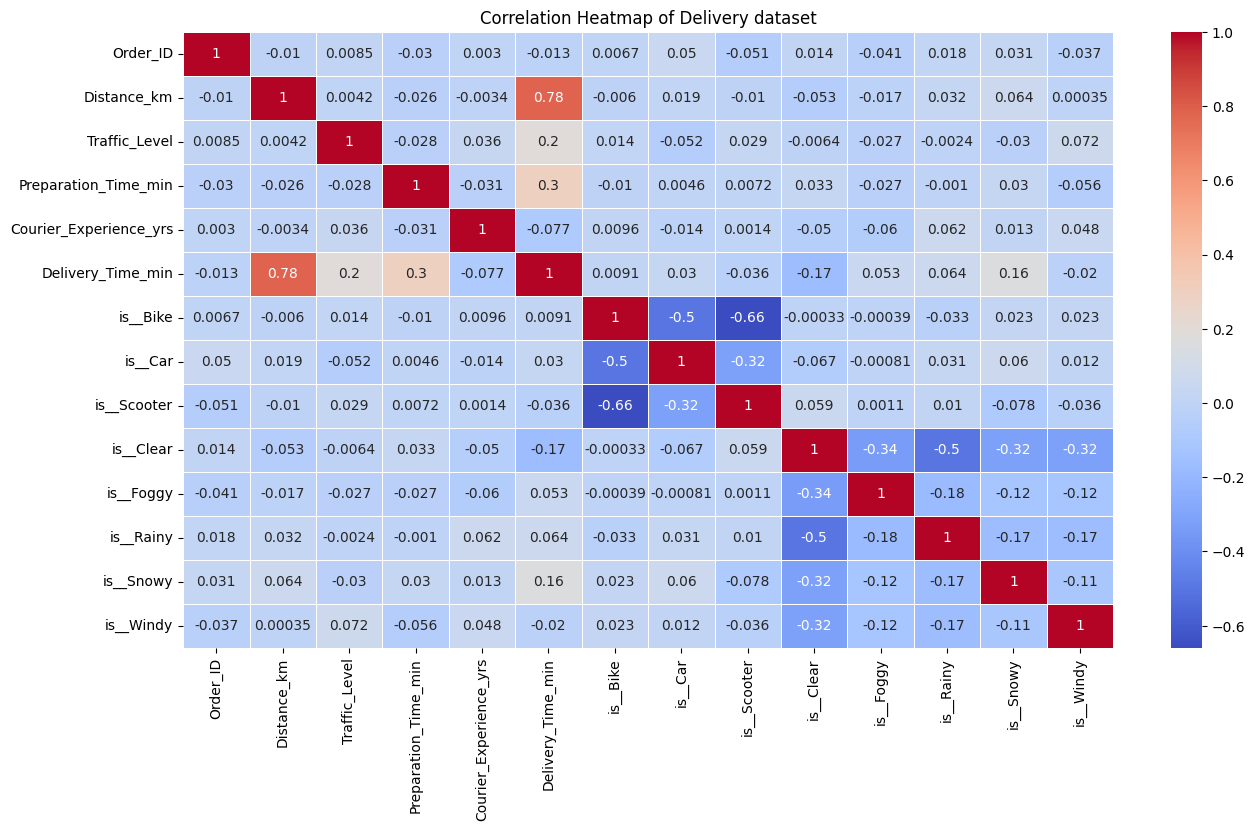

In [19]:
plt.figure(figsize=(15, 8))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Delivery dataset")
plt.show()

The correlation heatmap highlights key factors influencing delivery time. The strongest correlation is between delivery time and distance (0.78), confirming that longer distances lead to longer deliveries. Preparation time (0.3 correlation) also impacts delivery, as longer prep times extend overall delivery duration. Regarding transportation, couriers tend to use a single vehicle type, evident from the negative correlation between scooters and bicycles (-0.66) or cars (0.50). Weather conditions also play a role, with bad weather negatively correlated with clear conditions, affecting delivery efficiency. These insights form the basis for developing an accurate delivery time prediction model.

In [20]:
X = df.drop("Delivery_Time_min", axis = 1)
Y = df["Delivery_Time_min"]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 42)

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Regression

In [23]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

In [24]:
y_pred = tree_reg.predict(X_test)


In [25]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 167.4904
R² Score: 0.6178


In [26]:
param_grid_tree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='r2', n_jobs=-1)
grid_search_tree.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [28]:
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [29]:
best_tree = DecisionTreeRegressor(**grid_search_tree.best_params_, random_state=42)
best_tree.fit(X_train, Y_train)
y_pred_best_tree = best_tree.predict(X_test)

In [30]:
mse_best_tree = mean_squared_error(Y_test, y_pred_best_tree)
r2_best_tree = r2_score(Y_test, y_pred_best_tree)

print(f"Optimized MSE for Decision Tree: {mse_best_tree:.4f}")
print(f"Optimized R² Score for Decision Tree: {r2_best_tree:.4f}")

Optimized MSE for Decision Tree: 155.0615
Optimized R² Score for Decision Tree: 0.6462


# random forest regression

In [31]:
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42)
rf_reg.fit(X_train, Y_train)
y_pred = rf_reg.predict(X_test)

In [32]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 115.5411
R² Score: 0.7364


## hyper parameter tuning

In [33]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [34]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


In [35]:
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, Y_train)




RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=500,
                      random_state=42)

In [36]:
y_pred_best = best_rf.predict(X_test)

In [37]:
mse_best = mean_squared_error(Y_test, y_pred_best)
r2_best = r2_score(Y_test, y_pred_best)

print(f"Optimized MSE: {mse_best:.4f}")
print(f"Optimized R² Score: {r2_best:.4f}")

Optimized MSE: 105.8708
Optimized R² Score: 0.7584
